# LeNet CNN on MNIST

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import warnings
warnings.filterwarnings("ignore")

In [12]:
from tensorflow.keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
print("Initial shape of Data",(X_train.shape))
print("Number of samples in trainig data : " + str(len(X_train)))
print("Number of samples in test data : " + str(len(X_test)))

print("Dimension of X_train : " + str(X_train[0].shape))
print("Dimension of X_test : " +str(X_test[0].shape))

Initial shape of Data (60000, 28, 28)
Number of samples in trainig data : 60000
Number of samples in test data : 10000
Dimension of X_train : (28, 28)
Dimension of X_test : (28, 28)


In [7]:
# Visualize some data using OpenCV

import cv2

for i in range(0,6):
    ran_num = np.random.randint(0, len(X_train))
    img = X_train[ran_num]
    window_name = "Input image" + str(i)
    cv2.imshow(window_name,img)
    cv2.waitKey(0)
    
cv2.destroyAllWindows()

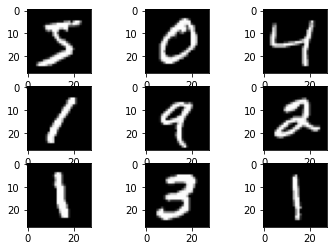

In [5]:
# Visualize some data using Matplotlib

for i in range(0,9):
    plt.subplot(331 + i)
    plt.imshow(X_train[i], cmap = plt.get_cmap("gray"))
    
plt.show()

# Preparaing Dataset for training

In [6]:
print(X_train.shape)
print(X_train[0].shape[0])

(60000, 28, 28)
28


In [13]:
img_rows = X_train[0].shape[0]
img_cols = X_train[1].shape[0]


#reshape the data into(60000, 28,28,1)

X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

input_shape = (img_rows, img_cols, 1)

print("input_shape", input_shape)

input_shape (28, 28, 1)


In [14]:
# Change the imgae data type into float type

X_train = X_train.astype("float32")
X_test = X_test.astype("float32")

# Nomalize the data 

X_train /= 255.0
X_test /= 255.0

print(X_train.shape)
print(X_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [15]:
#one Hot encode 

from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


In [16]:
print(y_train.shape)
print(y_test.shape)

(60000, 10)
(10000, 10)


In [44]:
print(y_test.shape[1])

y_train[0]

10


array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [12]:
num_classes = 10
num_pixels = 784

# Create the LeNet CNN

In [15]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import SGD
from tensorflow.keras import backend as K


model = Sequential()

model.add(Conv2D(20, (5,5),
                 padding = "same",
                 input_shape = input_shape))

model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2,2), strides = (2,2)))

model.add(Conv2D(50,(5,5),
                 padding = "same"))

model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2,2), strides = (2,2)))

#Fully Connected Layers
model.add(Flatten())
model.add(Dense(500))
model.add(Activation("relu"))

# Softmax for classification

model.add(Dense(num_classes))
model.add(Activation("softmax"))

model.compile(loss = "categorical_crossentropy",
              optimizer = tensorflow.keras.optimizers.Adadelta(),
              metrics = ["accuracy"])

print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 28, 28, 20)        520       
_________________________________________________________________
activation_4 (Activation)    (None, 28, 28, 20)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 20)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 50)        25050     
_________________________________________________________________
activation_5 (Activation)    (None, 14, 14, 50)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 7, 7, 50)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2450)             

# Train LeNet on MNIST

In [16]:
batch_size = 128
epochs = 10

history = model.fit(X_train,y_train,
                    batch_size = batch_size,
                    epochs = epochs,
                    validation_data = (X_test, y_test),
                    verbose = 1,
                    shuffle = True)

model.save("LeNet_CNN_MNIST.h5")

#Evaluate the train model

scores = model.evaluate(X_test, y_test, verbose = 1)

print("Test Loss", scores[0])
print("Test Accuracy", scores[1])

2021-09-15 03:09:54.299739: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 188160000 exceeds 10% of free system memory.


Epoch 1/10


2021-09-15 03:09:56.829166: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 23520000 exceeds 10% of free system memory.
2021-09-15 03:09:56.829402: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 23520000 exceeds 10% of free system memory.
2021-09-15 03:09:56.880974: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 17248000 exceeds 10% of free system memory.


469/469 [==============================] - 80s 166ms/step - loss: 2.2920 - accuracy: 0.1807 - val_loss: 2.2723 - val_accuracy: 0.2545
Epoch 2/10
469/469 [==============================] - 73s 155ms/step - loss: 2.2527 - accuracy: 0.3097 - val_loss: 2.2311 - val_accuracy: 0.3587
Epoch 3/10
469/469 [==============================] - 73s 155ms/step - loss: 2.2082 - accuracy: 0.4333 - val_loss: 2.1813 - val_accuracy: 0.5075
Epoch 4/10
469/469 [==============================] - 78s 166ms/step - loss: 2.1510 - accuracy: 0.5651 - val_loss: 2.1139 - val_accuracy: 0.6279
Epoch 5/10
469/469 [==============================] - 78s 166ms/step - loss: 2.0708 - accuracy: 0.6612 - val_loss: 2.0163 - val_accuracy: 0.6944
Epoch 6/10
469/469 [==============================] - 80s 172ms/step - loss: 1.9536 - accuracy: 0.7110 - val_loss: 1.8736 - val_accuracy: 0.7374
Epoch 7/10
469/469 [==============================] - 83s 176ms/step - loss: 1.7871 - accuracy: 0.7416 - val_loss: 1.6770 - val_accuracy: 0.7

In [17]:
import pickle

pickle_out = open("LeNet_clf_history.pickle","wb")
pickle.dump(history.history, pickle_out)
pickle_out.close()

In [2]:
import pickle
pickle_in = open("LeNet_clf_history.pickle","rb")
save_history = pickle.load((pickle_in))
print(save_history)

{'loss': [2.2919609546661377, 2.252728223800659, 2.2081942558288574, 2.1510066986083984, 2.0708260536193848, 1.9536043405532837, 1.787064790725708, 1.5695700645446777, 1.3249173164367676, 1.0999475717544556], 'accuracy': [0.18068332970142365, 0.3096500039100647, 0.4333166778087616, 0.5650666952133179, 0.661216676235199, 0.7110166549682617, 0.741599977016449, 0.7646833062171936, 0.7864000201225281, 0.8055833578109741], 'val_loss': [2.272313117980957, 2.231109857559204, 2.1813347339630127, 2.113858222961426, 2.0163207054138184, 1.87360680103302, 1.6770050525665283, 1.4350643157958984, 1.1880474090576172, 0.9824703931808472], 'val_accuracy': [0.25450000166893005, 0.3587000072002411, 0.5074999928474426, 0.6279000043869019, 0.6944000124931335, 0.7373999953269958, 0.7656999826431274, 0.7872999906539917, 0.8108000159263611, 0.8281999826431274]}


In [4]:
save_history

{'loss': [2.2919609546661377,
  2.252728223800659,
  2.2081942558288574,
  2.1510066986083984,
  2.0708260536193848,
  1.9536043405532837,
  1.787064790725708,
  1.5695700645446777,
  1.3249173164367676,
  1.0999475717544556],
 'accuracy': [0.18068332970142365,
  0.3096500039100647,
  0.4333166778087616,
  0.5650666952133179,
  0.661216676235199,
  0.7110166549682617,
  0.741599977016449,
  0.7646833062171936,
  0.7864000201225281,
  0.8055833578109741],
 'val_loss': [2.272313117980957,
  2.231109857559204,
  2.1813347339630127,
  2.113858222961426,
  2.0163207054138184,
  1.87360680103302,
  1.6770050525665283,
  1.4350643157958984,
  1.1880474090576172,
  0.9824703931808472],
 'val_accuracy': [0.25450000166893005,
  0.3587000072002411,
  0.5074999928474426,
  0.6279000043869019,
  0.6944000124931335,
  0.7373999953269958,
  0.7656999826431274,
  0.7872999906539917,
  0.8108000159263611,
  0.8281999826431274]}

# Plotting Accuracy and Loss

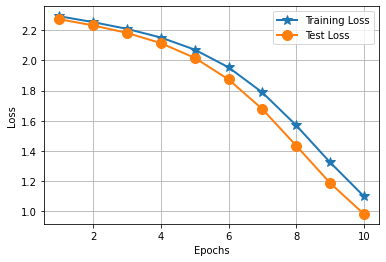

In [7]:
## plotting Loss Chart

loss_values = save_history["loss"]
val_loss_values = save_history["val_loss"]

epochs = range(1, len(loss_values)+1)

line1 = plt.plot(epochs, loss_values, label= "Training Loss")
line2 = plt.plot(epochs, val_loss_values, label = "Test Loss")

plt.setp(line1,linewidth = 2.0, marker = "*", markersize = 10.0)
plt.setp(line2,linewidth = 2.0, marker = "o", markersize = 10.0)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.grid(True)
plt.legend()
plt.show()

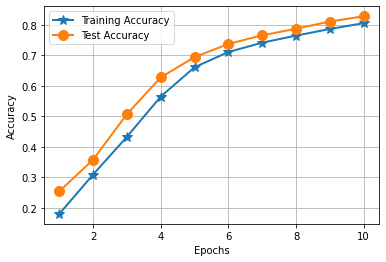

In [8]:
# plotting Accuracy

acc = save_history["accuracy"]
val_acc = save_history["val_accuracy"]

epochs = range(1, len(acc)+1)

line1 = plt.plot(epochs, acc, label = "Training Accuracy")
line2 = plt.plot(epochs, val_acc, label = "Test Accuracy")

plt.setp(line1, linewidth = 2.0, marker = "*", markersize = 10.0)
plt.setp(line2 , linewidth = 2.0, marker = "o", markersize = 10.0)
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.grid(True)
plt.legend()
plt.show()

In [10]:
#Load our model

from tensorflow.keras.models import load_model

classifier = load_model("LeNet_CNN_MNIST.h5")

# Testing the Classifier

In [17]:
import numpy as np
import cv2

def draw_test(name, pred, input_im):
    BLACK = [0,0,0]
    expanded_img = cv2.copyMakeBorder(input_im ,0,0,0,imageL.shape[0], cv2.BORDER_CONSTANT, value = BLACK)
    expanded_img = cv2.cvtColor(expanded_img, cv2.COLOR_GRAY2BGR)
    cv2.putText(expanded_img, str(pred),(120,70),cv2.FONT_HERSHEY_COMPLEX_SMALL,4,(0,222,0),4)
    cv2.imshow(name, expanded_img)
    

for i in range(0,10):
    num = np.random.randint(0,len(X_test))
    input_im = X_test[num]
    
    imageL = cv2.resize(input_im , None,fx = 4, fy = 4, interpolation = cv2.INTER_CUBIC)
    input_im = input_im.reshape(1,28,28,1)
    
    #prediction 
    
    res = str(classifier.predict_classes(input_im, 1,verbose = 0)[0])
    
    draw_test("prediction",res,imageL)
    cv2.waitKey(0)
    
cv2.destroyAllWindows()

2021-09-16 02:28:36.620522: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2021-09-16 02:28:36.691825: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 2194740000 Hz
